### Problem 2: Non-linear classification with ANN
In this problem, we want to build an ANN model to solve multiclass non-linear classification problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/Users/GYUNAM/.pyenv/versions/3.4.5/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

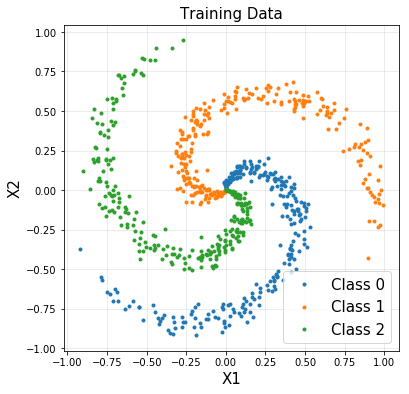

In [3]:
# data generation

N = 250
n_class = 3

X, Y = [], []
r = np.linspace(0, 1, N)
for i in range(n_class):
    theta = np.linspace(4*i, 4*(i+1), N) + 0.2*np.random.randn(N)
    xp = np.array([r*np.sin(theta), r*np.cos(theta)])
    yp = i*np.ones(N)
    X.append(xp), Y.append(yp)
X = np.concatenate(X, axis=1).T
Y = np.concatenate(Y)

plt.figure(figsize=(6, 6))
plt.title('Training Data', fontsize=15)
plt.plot(X[Y==0,0], X[Y==0,1], '.', label='Class 0')
plt.plot(X[Y==1,0], X[Y==1,1], '.', label='Class 1')
plt.plot(X[Y==2,0], X[Y==2,1], '.', label='Class 2')
plt.xlim(min(X[:,0]) - 0.1, max(X[:,0]) + 0.1)
plt.ylim(min(X[:,1]) - 0.1, max(X[:,1]) + 0.1)
plt.legend(loc='lower right', fontsize=15)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

In [4]:
print(X.shape)
print(Y.shape)
print(Y[1])

(750, 2)
(750,)
0.0


In [5]:
# one hot encoding (provided)

n_output = 3
ohe = OneHotEncoder()
ohe.fit(np.arange(n_output).reshape(-1, 1))
Y = ohe.transform(Y.reshape(-1,1)).toarray()

print('Train labels : {}'.format(Y[0,:]))

Train labels : [1. 0. 0.]


In [6]:
# design your network with two hidden layers (there is no specific reason for having two layers)

n_input = 2
n_hidden1 = 100
n_hidden2 = 50
n_output = 3

In [7]:
# define decision variables in tf

weights = {
    'hidden1' : tf.Variable(tf.random_normal([n_input,n_hidden1],stddev=0.1)),
    'hidden2' : tf.Variable(tf.random_normal([n_hidden1,n_hidden2],stddev=0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden2,n_output],stddev=0.1)),
}

biases = {
    'hidden1' : tf.Variable(tf.random_normal([n_hidden1],stddev=0.1)),
    'hidden2' : tf.Variable(tf.random_normal([n_hidden2],stddev=0.1)),
    'output' : tf.Variable(tf.random_normal([n_output],stddev=0.1)),
}

In [8]:
# define placeholders

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

In [9]:

# define a network model

def ANN(x, weights, biases):
    hidden1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
    hidden1 = tf.nn.relu(hidden1)
    
    hidden2 = tf.add(tf.matmul(hidden1, weights['hidden2']), biases['hidden2'])
    hidden2 = tf.nn.relu(hidden2)
    
    output = tf.add(tf.matmul(hidden2, weights['output']), biases['output'])
    return output

In [10]:
# define loss using tf.nn.softmax_cross_entropy_with_logits

pred = ANN(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [11]:
# define an optimizer

LR = 0.01
optm = tf.train.AdamOptimizer(LR).minimize(loss)

In [12]:
# tf.Variable initializer

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [13]:
# define parameters 

n_batch = 50
n_iter = 2500
n_prt = 250

In [14]:
# 'next-batch function' is provided

def next_batch(X, y, n_batch=50):
    X_ = []
    y_ = []
    n_data = X.shape[0]
    for i in range(n_batch):
        idx = np.random.randint(n_data)
        X_.append(X[idx,:])
        y_.append(y[idx,:])
    X, y = np.array(X_), np.array(y_)
    
    return X, y

In [15]:
# optimizing

for epoch in range(1, n_iter+1):
    x_train, y_train = next_batch(X, Y)
    sess.run(optm, feed_dict={x:x_train, y:y_train})
    if epoch % n_prt == 0:
        c = sess.run(loss, feed_dict={x: x_train, y:y_train})
        print("Iter: {}".format(epoch))
        print("Cost: {}".format(c))

(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)


(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)


(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)


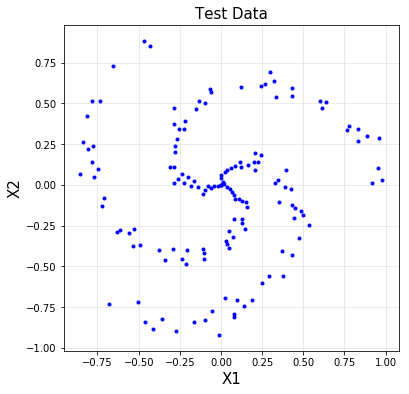

In [16]:
# generate new test data set (provided)

N = 50
n_class = 3
    
X_test, Y_test = [], []
r = np.linspace(0, 1, N)
for i in range(n_class):
    theta = np.linspace(4*i, 4*(i+1), N) + 0.2*np.random.randn(N)
    xp = np.array([r*np.sin(theta), r*np.cos(theta)])
    yp = i*np.ones(N)
    X_test.append(xp), Y_test.append(yp)
X_test = np.concatenate(X_test, axis=1).T
Y_test = np.concatenate(Y_test)

plt.figure(figsize=(6, 6))
plt.title('Test Data', fontsize=15)
plt.plot(X_test[Y_test==0,0], X_test[Y_test==0,1], 'b.')
plt.plot(X_test[Y_test==1,0], X_test[Y_test==1,1], 'b.')
plt.plot(X_test[Y_test==2,0], X_test[Y_test==2,1], 'b.')
plt.xlim(min(X_test[:,0]) - 0.1, max(X_test[:,0]) + 0.1)
plt.ylim(min(X_test[:,1]) - 0.1, max(X_test[:,1]) + 0.1)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

In [17]:

# measure the accuracy (provided)

my_pred = sess.run(pred, feed_dict={x : X_test})
my_pred = np.argmax(my_pred, axis=1)
labels = Y_test

accr = np.mean(np.equal(my_pred, labels))
print('Accuracy : {:.2f}%'.format(accr*100))

Accuracy : 98.67%


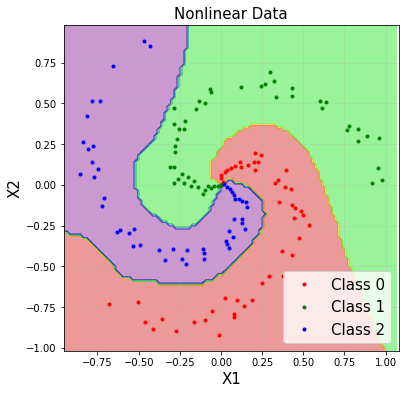

In [18]:
# provided

h = 0.02  # step size in the mesh
x_min, x_max = X_test[:,0].min() - 0.1, X_test[:,0].max() + 0.1
y_min, y_max = X_test[:,1].min() - 0.1, X_test[:,1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = sess.run(pred, feed_dict={x : np.c_[xx.ravel(), yy.ravel()]})
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.title('Nonlinear Data', fontsize=15)
plt.plot(X_test[my_pred==0,0], X_test[my_pred==0,1], 'r.', label='Class 0')
plt.plot(X_test[my_pred==1,0], X_test[my_pred==1,1], 'g.', label='Class 1')
plt.plot(X_test[my_pred==2,0], X_test[my_pred==2,1], 'b.', label='Class 2')
plt.xlim(min(X_test[:,0]) - 0.1, max(X_test[:,0]) + 0.1)
plt.ylim(min(X_test[:,1]) - 0.1, max(X_test[:,1]) + 0.1)
plt.legend(loc='lower right', fontsize=15)
plt.contourf(xx, yy, Z, cmap=plt.cm.spectral_r, alpha=0.4)
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.grid(alpha=0.3)
plt.show()